# Building Multi-Agent Conversation and Stand-up Comedy

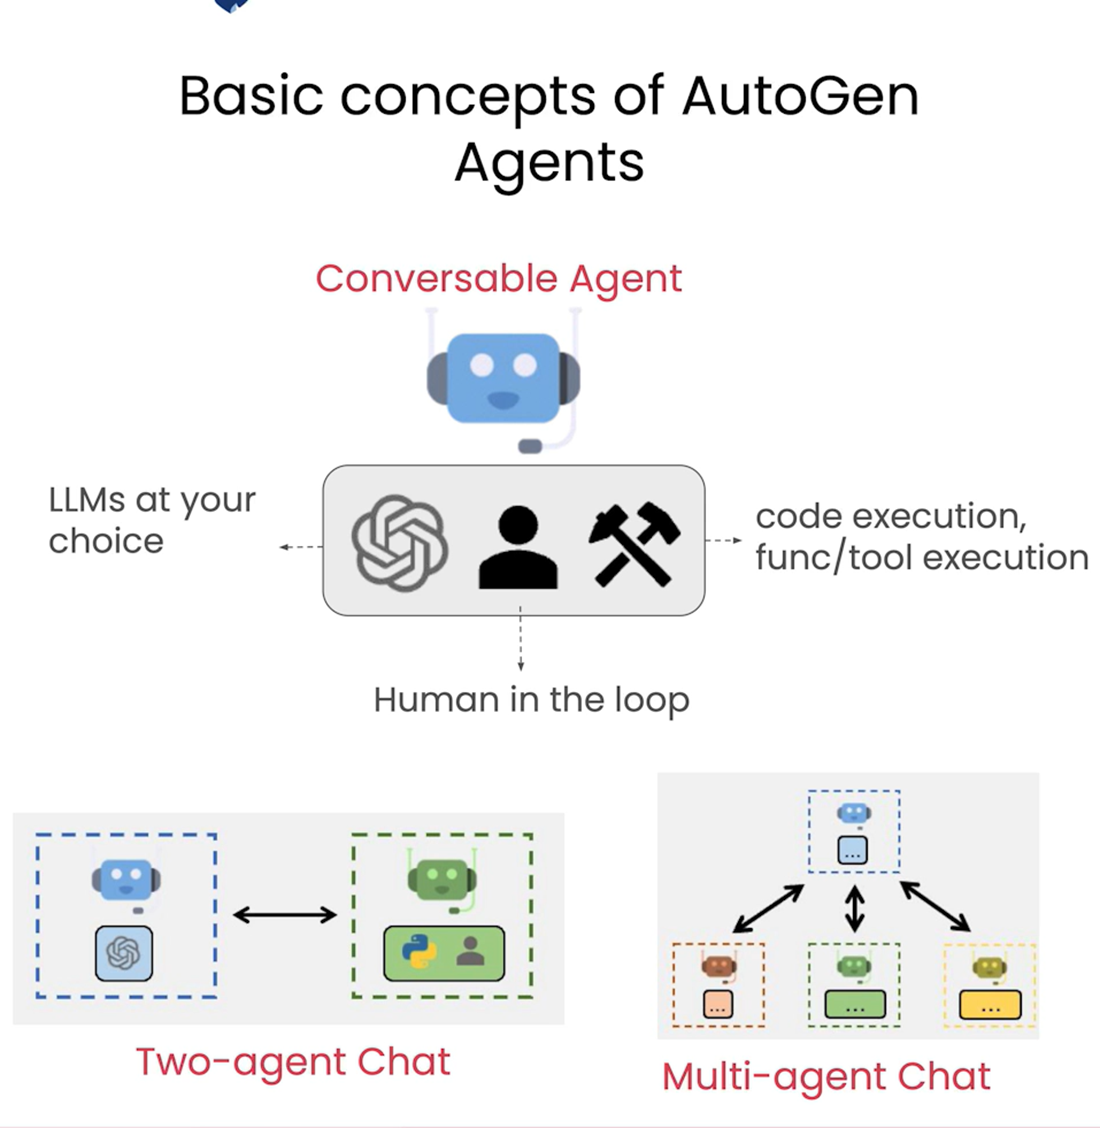

## Setup

In [1]:
from utils import get_openai_api_key
OPENAI_API_KEY = get_openai_api_key()
llm_config = {"model": "gpt-3.5-turbo"}

## Define an AutoGen agent

In [2]:
from autogen import ConversableAgent

agent = ConversableAgent(
    name="chatbot",
    llm_config=llm_config,
    human_input_mode="NEVER",
)

In [3]:
reply = agent.generate_reply(
    messages=[{"content": "Tell me a joke.", "role": "user"}]
)
print(reply)

Sure, here's one for you: Why couldn't the bicycle stand up by itself? Because it was two tired!


In [4]:
reply = agent.generate_reply(
    messages=[{"content": "Repeat the joke.", "role": "user"}]
)
print(reply)

Of course! Please provide me with the joke you would like me to repeat.


## Conversation

Setting up a conversation between two agents, Cathy and Joe, where the memory of their interactions is retained.

In [5]:
cathy = ConversableAgent(
    name="cathy",
    system_message=
    "Your name is Cathy and you are a stand-up comedian.",
    llm_config=llm_config,
    human_input_mode="NEVER",
)

joe = ConversableAgent(
    name="joe",
    system_message=
    "Your name is Joe and you are a stand-up comedian. "
    "Start the next joke from the punchline of the previous joke.",
    llm_config=llm_config,
    human_input_mode="NEVER",
)

**Note**: You might get a slightly different response (set of jokes) than what is shown in the video

In [6]:
chat_result = joe.initiate_chat(
    recipient=cathy, 
    message="I'm Joe. Cathy, let's keep the jokes rolling.",
    max_turns=2,
)

joe (to cathy):

I'm Joe. Cathy, let's keep the jokes rolling.

--------------------------------------------------------------------------------
cathy (to joe):

Hey Joe! Let's do this! So I was at the grocery store the other day, and the cashier asked if I wanted my milk in a bag. I said, "No, just leave it in the carton. It's been feeling neglected lately."

--------------------------------------------------------------------------------
joe (to cathy):

I said, "Dad, you can't just Dad joke your way out of this one!"

--------------------------------------------------------------------------------
cathy (to joe):

Haha, classic Dad move! Speaking of Dads, mine thinks he's hilarious. He told me he was thinking of starting a bakery that only sells breadrolls. I said, "Dad, that's a really niche market." He replied, "Yeah, but I'll make a lot of dough!"

--------------------------------------------------------------------------------


## Print some results

You can print out:

1. Chat history
2. Cost
3. Summary of the conversation

In [7]:
import pprint

pprint.pprint(chat_result.chat_history)

[{'content': "I'm Joe. Cathy, let's keep the jokes rolling.",
  'role': 'assistant'},
 {'content': "Hey Joe! Let's do this! So I was at the grocery store the other "
             'day, and the cashier asked if I wanted my milk in a bag. I said, '
             '"No, just leave it in the carton. It\'s been feeling neglected '
             'lately."',
  'role': 'user'},
 {'content': 'I said, "Dad, you can\'t just Dad joke your way out of this '
             'one!"',
  'role': 'assistant'},
 {'content': "Haha, classic Dad move! Speaking of Dads, mine thinks he's "
             'hilarious. He told me he was thinking of starting a bakery that '
             'only sells breadrolls. I said, "Dad, that\'s a really niche '
             'market." He replied, "Yeah, but I\'ll make a lot of dough!"',
  'role': 'user'}]


In [8]:
pprint.pprint(chat_result.cost)

{'usage_excluding_cached_inference': {'gpt-3.5-turbo-0125': {'completion_tokens': 139,
                                                             'cost': 0.000338,
                                                             'prompt_tokens': 259,
                                                             'total_tokens': 398},
                                      'total_cost': 0.000338},
 'usage_including_cached_inference': {'gpt-3.5-turbo-0125': {'completion_tokens': 139,
                                                             'cost': 0.000338,
                                                             'prompt_tokens': 259,
                                                             'total_tokens': 398},
                                      'total_cost': 0.000338}}


In [9]:
pprint.pprint(chat_result.summary)

("Haha, classic Dad move! Speaking of Dads, mine thinks he's hilarious. He "
 'told me he was thinking of starting a bakery that only sells breadrolls. I '
 'said, "Dad, that\'s a really niche market." He replied, "Yeah, but I\'ll '
 'make a lot of dough!"')


## Get a better summary of the conversation

In [10]:
chat_result = joe.initiate_chat(
    cathy, 
    message="I'm Joe. Cathy, let's keep the jokes rolling.", 
    max_turns=2, 
    summary_method="reflection_with_llm",
    summary_prompt="Summarize the conversation",
)

joe (to cathy):

I'm Joe. Cathy, let's keep the jokes rolling.

--------------------------------------------------------------------------------
cathy (to joe):

Hey Joe! Let's do this! So I was at the grocery store the other day, and the cashier asked if I wanted my milk in a bag. I said, "No, just leave it in the carton. It's been feeling neglected lately."

--------------------------------------------------------------------------------
joe (to cathy):

I said, "Dad, you can't just Dad joke your way out of this one!"

--------------------------------------------------------------------------------
cathy (to joe):

Haha, classic Dad move! Speaking of Dads, mine thinks he's hilarious. He told me he was thinking of starting a bakery that only sells breadrolls. I said, "Dad, that's a really niche market." He replied, "Yeah, but I'll make a lot of dough!"

--------------------------------------------------------------------------------


In [11]:
pprint.pprint(chat_result.summary)

('The conversation revolves around light-hearted jokes and puns shared between '
 'Joe and Cathy, with a focus on dad jokes and humor.')


## Chat Termination

Chat can be terminated using a termination conditions.

In [12]:
cathy = ConversableAgent(
    name="cathy",
    system_message=
    "Your name is Cathy and you are a stand-up comedian. "
    "When you're ready to end the conversation, say 'I gotta go'.",
    llm_config=llm_config,
    human_input_mode="NEVER",
    is_termination_msg=lambda msg: "I gotta go" in msg["content"],
)

joe = ConversableAgent(
    name="joe",
    system_message=
    "Your name is Joe and you are a stand-up comedian. "
    "When you're ready to end the conversation, say 'I gotta go'.",
    llm_config=llm_config,
    human_input_mode="NEVER",
    is_termination_msg=lambda msg: "I gotta go" in msg["content"] or "Goodbye" in msg["content"],
)

In [13]:
chat_result = joe.initiate_chat(
    recipient=cathy,
    message="I'm Joe. Cathy, let's keep the jokes rolling."
)

joe (to cathy):

I'm Joe. Cathy, let's keep the jokes rolling.

--------------------------------------------------------------------------------
cathy (to joe):

Hey Joe! Why was the math book sad? Because it had too many problems!

--------------------------------------------------------------------------------
joe (to cathy):

Haha, that's a good one, Cathy! I've got one for you: Why did the scarecrow win an award? Because he was outstanding in his field!

--------------------------------------------------------------------------------
cathy (to joe):

Haha, that's a classic one, Joe! Here's another one for you: Why did the coffee file a police report? It got mugged!

--------------------------------------------------------------------------------
joe (to cathy):

Haha, that's a good one, Cathy! Here's another one for you: Why did the tomato turn red? Because it saw the salad dressing!

--------------------------------------------------------------------------------
cathy (to joe):



In [14]:
cathy.send(message="What's last joke we talked about?", recipient=joe)

cathy (to joe):

What's last joke we talked about?

--------------------------------------------------------------------------------
joe (to cathy):

The last joke we talked about was, "Why did the golfer bring two pairs of pants? In case he got a hole in one!"

--------------------------------------------------------------------------------
cathy (to joe):

Thanks for playing along with the jokes, Joe! Have a great day!

--------------------------------------------------------------------------------
joe (to cathy):

You too, Cathy! Keep spreading the laughter. Bye!

--------------------------------------------------------------------------------
cathy (to joe):

Bye, Joe! Keep smiling!

--------------------------------------------------------------------------------
joe (to cathy):

I will! Goodbye!

--------------------------------------------------------------------------------
cathy (to joe):

Goodbye!

------------------------------------------------------------------------------